In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import os
import inspect
import pandas as pd

project_path = os.path.abspath( os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) + "/../" + "/../")
sys.path.insert(0, project_path)
print(project_path)

from DatabaseStorage.Program.Objects.Human import *
from DatabaseStorage.Program.Objects.Issue import *
from DatabaseStorage.Program.Objects.Machine import *
from DatabaseStorage.Program.Objects.MaintenanceWorkOrder import *
from DatabaseStorage.Program.Objects.Tag import *

from DatabaseStorage.Program.Database.Database_Properties import *
from DatabaseStorage.Program.Database.Database import *
from DatabaseStorage.Program.Database.Main import *

from DatabaseStorage.Program.KPI.KPI import *


from DatabaseStorage.Program.Others.MyDate import *

/Users/sam11/Git/ml-py


# DATABASE

## FILES

### NIST server

### Greystone

In [2]:
PassWord = 'GREYSTONE!!'
#file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'GreyStone_Data.csv')
file = os.path.join(project_path , 'Data_CSV', 'GS_tokenized.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 15,
                NodeHuman.VALUE_OPERATOR.value: 13,

                NodeTag.VALUE_ITEM.value: 17,
                NodeTag.VALUE_PROBLEM.value: 19,
                NodeTag.VALUE_SOLUTION.value: 20,
                NodeTag.VALUE_NA.value: 18,
                NodeTag.VALUE_UNKNOWN.value: 21,
                NodeTag.VALUE_STOP_WORDS.value: 22,

                NodeMachine.VALUE_MACHINE.value: 7,
                NodeIssue.VALUE_MACHINE_DOWN.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 0,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 1,
                NodeIssue.VALUE_PART_PROCESS.value: 16,
                
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value: 9,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value + "2": 10,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value: 11,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value + "2": 12
                }

def date_cleanizer(date, time="0000"):
    """
    clean the date from GS data

    :param date: the date
    :param time: the time
    :return: a DateTime
    """

####    DATE ####
    if date is "":
        return None

    date = date.replace(" ","").split("/")

    date[2] = "20" + date[2]

    if len(date[0]) is 1:
        date[0] = "0" + date[0]
    else:
        date[0] = date[0]

    if len(date[1]) is 1:
        date[1] = "0" + date[1]
    else:
        date[1] = date[1]

#### TIME ####
    while len(time) < 4:
        time = "0" + time.replace(" ", "")

    return datetime(year=int(date[2]), month=int(date[0]), day=int(date[1]), hour=int(time[:2]), minute=int(time[2:]))

### Psu

In [ ]:
PassWord = 'PSU!!'
file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'Psu_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 18,

                NodeMachine.VALUE_MACHINE.value: 3,
                NodeMachine.VALUE_TYPE.value:6,
                NodeMachine.VALUE_MANUFACTURER.value:5,
                NodeMachine.VALUE_LOCASION.value:4,


                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 11,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 19,
                NodeIssue.VALUE_DESCRIPTION_CAUSE.value:12,
                NodeIssue.VALUE_MACHINE_DOWN.value: 13,
                }

### Hvac

In [ ]:
PassWord = 'HVAC!!'
file = os.path.join(project_path, 'DatabaseStorage' , 'Data_CSV', 'Hvac_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 10,
                NodeHuman.VALUE_OPERATOR.value: 43,

                NodeMachine.VALUE_MACHINE.value: 7,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 247,
                }
date_cleanizer = None

### Auto

In [ ]:
PassWord = 'AUTO!!'
file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'Auto_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 4,
                NodeHuman.VALUE_OPERATOR.value: 11,
                NodeHuman.VALUE_CRAFTS.value: 16,
                NodeHuman.VALUE_SKILLS.value: 17,

                NodeMachine.VALUE_MACHINE.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 7,
                }

### Mine

In [ ]:
PassWord = 'MINE!!'
file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'Mine_Data.csv')

localization = {}

## ACTION

### Connect

In [3]:
database = DatabaseNeo4J("bolt://127.0.0.1:7687", "neo4j", PassWord)

In [ ]:
database = DatabaseNeo4J("bolt://127.0.0.1:7687", "neo4j", "11/Jul/2017!")

## Indexs

In [ ]:
database.createIndexes()

In [ ]:
database.dropIndexes()

## Data

In [ ]:
graph_database_from_csv(database, file, localization, date_cleanizer)

In [ ]:
# token_dataframe = pd.DataFrame.from_csv("GS_tokenized_forSascha.csv", index_col =None)
# graph_database_from_tag_extractor(database = database, token_dataframe = token_dataframe)

In [ ]:
database.deleteData()

# KPI

# KPI using Object

In [4]:
tec = Technician(name=["_"])
ope = Operator(name=["_"])

i3=Issue(problem=["_"], solution=["_"], machine_down="_",date_maintenance_work_order_issue=["_"], date_maintenance_work_order_close=["_"],part_in_process=["_"] )
i=Issue(date_maintenance_work_order_issue=["_"])
mac = Machine(name=["_","h11", "h1"])

tagI = TagItem(keyword = ["_"])
tagS = TagAction(keyword = ["_"] , it_is="s")
tagP = TagAction(keyword = ["_"] , it_is="p")



In [5]:
objects = [i3]
query, results = cypher_from_kpi(objects)

In [6]:
dataframe, results = pandas_from_cypher_kpi(database, query, results)

3424it [00:00, 141796.56it/s]

the query has been executed with succes


In [12]:
dataframe[dataframe["issue_count"]==2]

,issue.description_of_problem,issue.description_of_solution,issue.part_in_process,issue.machine_down,issue.date_maintenance_work_order_close,issue.date_maintenance_work_order_issue,issue_count,issue.time_work_order_completion
271,Clean base,Completed,None,None,2015-09-18,2015-09-18,2,0.0
877,Base clean,Completed,None,None,2015-10-01,2015-10-01,2,0.0
1870,Base cleaning requested,Completed,None,None,2015-12-07,2015-12-07,2,0.0
1960,Accumulator pressure dropping 20-30bar,Ruptured bladder replaced,None,None,2016-01-14,2016-01-14,2,0.0
2018,Cooling unit faults,After review/ Steve A believed the coils to be...,None,None,2015-12-06,2015-12-03,2,259200.0
2173,Base Cleaning,Cleaned,None,None,2015-03-25,2015-03-25,2,0.0
2330,Base needs to be cleaned,Completed,None,None,2015-06-15,2015-06-15,2,0.0
2544,Check/ Charge / and Tag Accumulator,Completed -was low,None,None,2015-05-27,2015-05-27,2,0.0
2881,Accumulator check requested,No Issue -Found at 26bar and charged to 30bar,None,None,2016-02-05,2016-02-05,2,0.0
2882,Dropping out of gear,Adjusted clutch,None,None,2015-12-14,2015-12-14,2,0.0


In [8]:
print(results)

['issue.description_of_problem', 'issue.description_of_solution', 'issue.part_in_process', 'issue.machine_down', 'issue.date_maintenance_work_order_close', 'issue.date_maintenance_work_order_issue', 'issue_count', 'issue.time_work_order_completion']


/Users/sam11/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


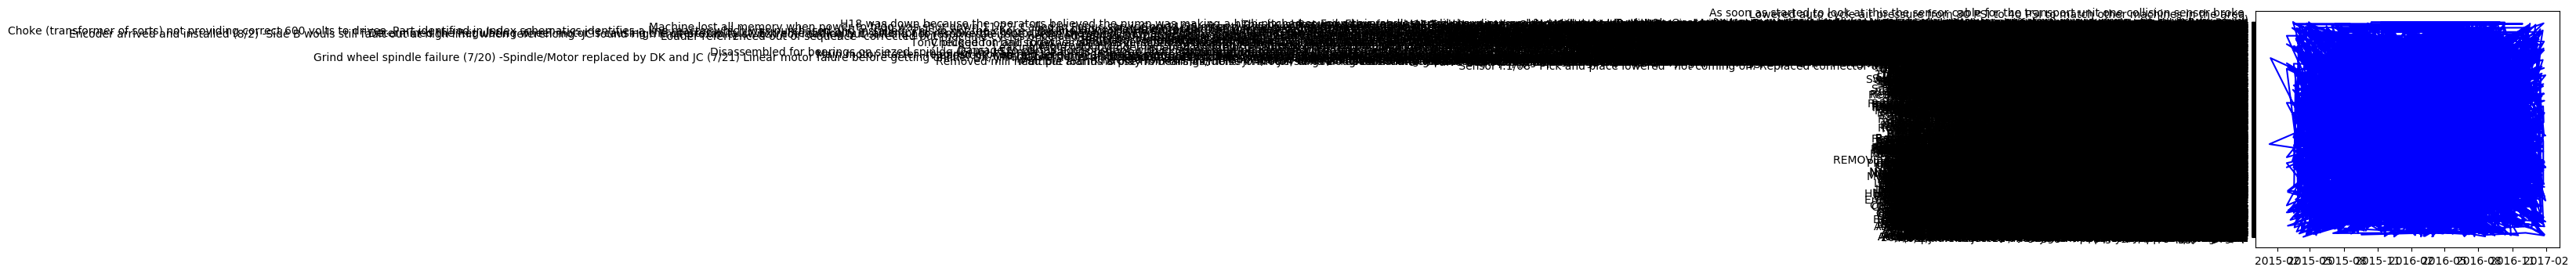

In [39]:
from matplotlib import pyplot

fig = pyplot.figure(figsize=(5, 4), dpi=100)
axes = fig.add_subplot(111)
axes.plot_date(dataframe["issue.date_maintenance_work_order_issue"], dataframe["issue.description_of_solution"],'b-')

fig.show()

In [44]:
dataframe.sort_values("issue_count", ascending=False, )

In [45]:
df

,issue.description_of_problem,issue.description_of_solution,issue.part_in_process,issue.machine_down,issue.date_maintenance_work_order_close,issue.date_maintenance_work_order_issue,issue_count,issue.time_work_order_completion
2882,Dropping out of gear,Adjusted clutch,None,None,2015-12-14 00:00:00,2015-12-14 00:00:00,2,0.000000e+00
3215,Accumulator on Iemca needs to be charged,New accumulator installed,None,None,2015-05-14 00:00:00,2015-05-14 00:00:00,2,0.000000e+00
2173,Base Cleaning,Cleaned,None,None,2015-03-25 00:00:00,2015-03-25 00:00:00,2,0.000000e+00
2953,Main spindle collet will not open/close,Added oil to main spindle reservoir -Oper PM,None,None,2015-12-11 00:00:00,2015-12-11 00:00:00,2,0.000000e+00
2330,Base needs to be cleaned,Completed,None,None,2015-06-15 00:00:00,2015-06-15 00:00:00,2,0.000000e+00
2544,Check/ Charge / and Tag Accumulator,Completed -was low,None,None,2015-05-27 00:00:00,2015-05-27 00:00:00,2,0.000000e+00
3223,Accumulator check requested,Both OK,None,None,2016-02-18 00:00:00,2016-02-18 00:00:00,2,0.000000e+00
2018,Cooling unit faults,After review/ Steve A believed the coils to be...,None,None,2015-12-06 00:00:00,2015-12-03 00:00:00,2,2.592000e+05
877,Base clean,Completed,None,None,2015-10-01 00:00:00,2015-10-01 00:00:00,2,0.000000e+00
1960,Accumulator pressure dropping 20-30bar,Ruptured bladder replaced,None,None,2016-01-14 00:00:00,2016-01-14 00:00:00,2,0.000000e+00
